In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
#criando a base de dados
data = pd.DataFrame({
    'precisao na montagem': ['alta', 'media', 'alta', 'media', 'baixa', 'baixa'],
    'velocidade de producao':['media', 'baixa', 'alta', 'alta', 'baixa', 'media'],
    'taxa de retrabalho':['baixa', 'alta', 'baixa', 'baixa', 'alta', 'alta'],
    'classifi': ['alta qualidade', 'baixa qualidade', 'alta qualidade', 'alta qualidade', 'baixa qualidade', 'baixa qualidade']
})

Acurácia: 1.0
Matriz de Confusão: 
[[1 0]
 [0 1]]


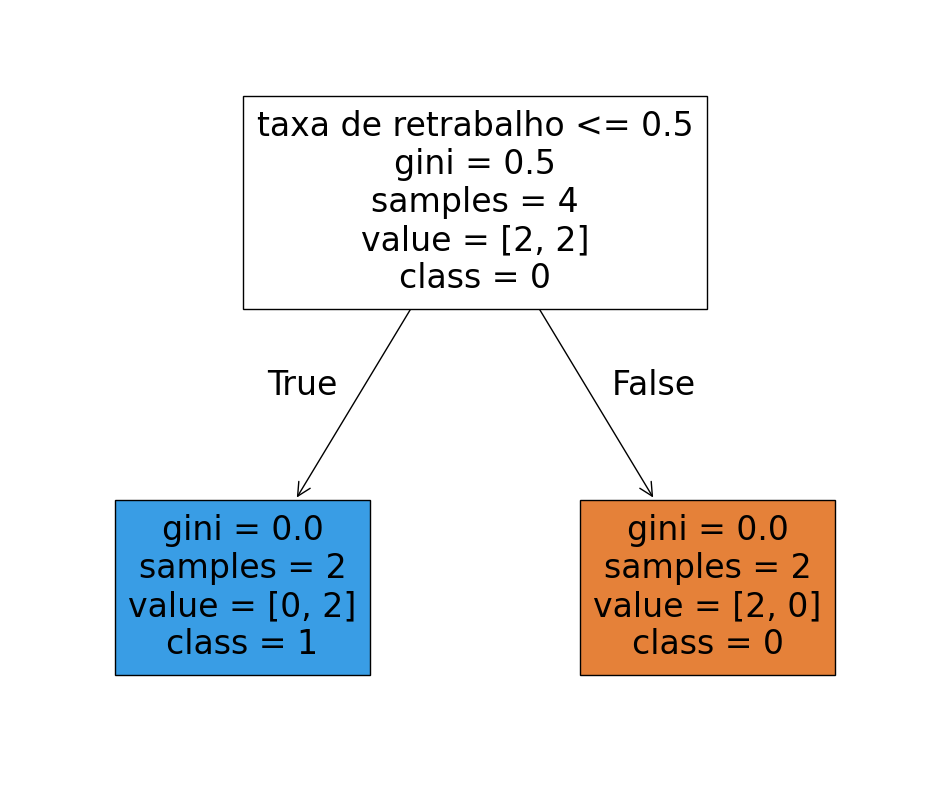

In [14]:
# Convertendo as variáveis categóricas em numéricas
label_encoder = LabelEncoder()

# Aplicando o LabelEncoder nas colunas categóricas
data['precisao na montagem'] = label_encoder.fit_transform(data['precisao na montagem'])
data['velocidade de producao'] = label_encoder.fit_transform(data['velocidade de producao'])
data['taxa de retrabalho'] = label_encoder.fit_transform(data['taxa de retrabalho'])
data['classifi'] = label_encoder.fit_transform(data['classifi'])

# Preparando os dados (com múltiplas variáveis)
x = np.array(data[['precisao na montagem', 'velocidade de producao', 'taxa de retrabalho']])
y = np.array(data['classifi'])

# Dividindo os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

# Treinando o modelo de árvore de decisão
model = DecisionTreeClassifier()
model.fit(x_treino, y_treino)

# Fazendo previsões
prev = model.predict(x_teste)

# Calculando a acurácia
accuracy = accuracy_score(y_teste, prev)

# Matriz de confusão
matrix = confusion_matrix(y_teste, prev)

print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão: \n{matrix}')

# Nome das classes originais para o plot
class_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Certificando-se de que class_names são strings
class_names = [str(name) for name in class_names]

# Plotando a árvore de decisão
fig = plt.figure(figsize=(12,10))
tree.plot_tree(model, 
               feature_names=['precisao na montagem', 'velocidade de producao', 'taxa de retrabalho'], 
               class_names=class_names, 
               filled=True)
plt.show()